In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [5]:
insurance_data = pd.read_csv("C:\\Users\\DELL\\Downloads\\insurance.csv")

In [6]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
insurance_data.shape

(1338, 7)

In [10]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Figure size 600x600 with 0 Axes>

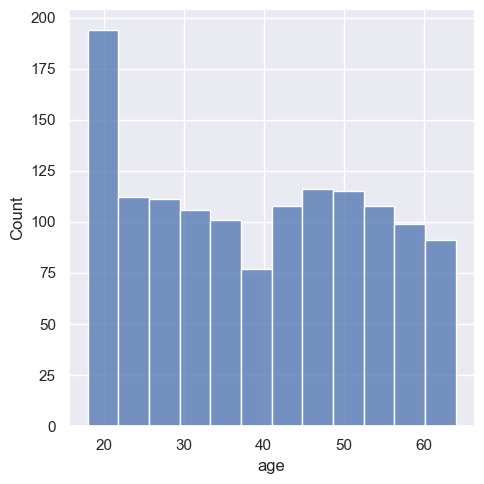

In [11]:
sns.set()
plt.figure(figsize = (6, 6))
sns.displot(insurance_data["age"])
plt.show()

In [12]:
insurance_data["age"].value_counts()

age
18    69
19    68
46    29
52    29
50    29
47    29
48    29
51    29
45    29
20    29
24    28
27    28
28    28
25    28
23    28
49    28
54    28
53    28
22    28
21    28
26    28
31    27
41    27
44    27
43    27
42    27
29    27
30    27
40    27
32    26
33    26
57    26
34    26
55    26
56    26
35    25
58    25
37    25
59    25
39    25
36    25
38    25
62    23
60    23
63    23
61    23
64    22
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

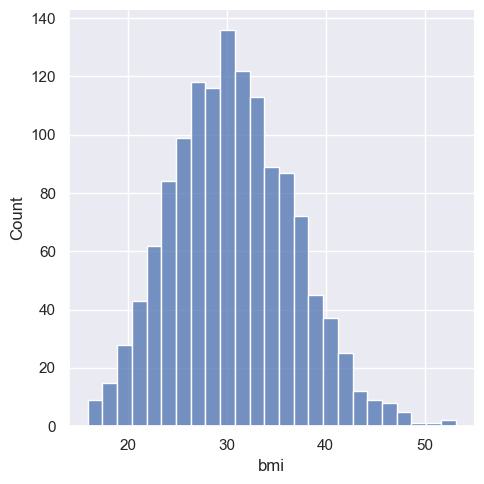

In [13]:
sns.set()
plt.figure(figsize = (6, 6))
sns.displot(insurance_data["bmi"])
plt.show()

<Figure size 600x600 with 0 Axes>

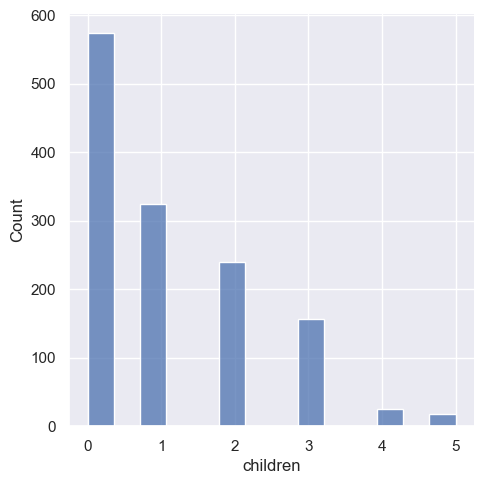

In [14]:
sns.set()
plt.figure(figsize = (6, 6))
sns.displot(insurance_data["children"])
plt.show()

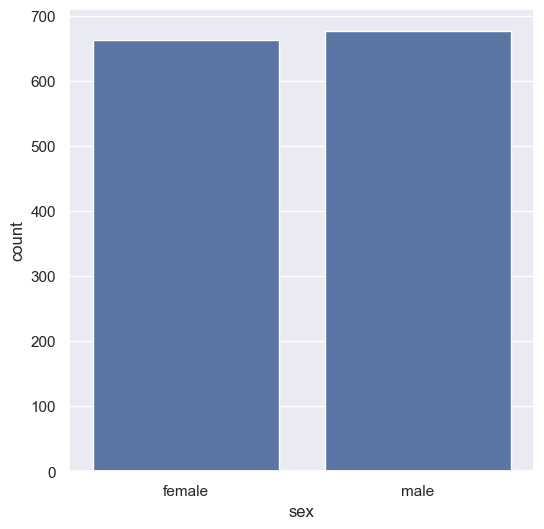

In [15]:
sns.set()
plt.figure(figsize = (6, 6))
sns.countplot(x = insurance_data["sex"], data = insurance_data)
plt.show()

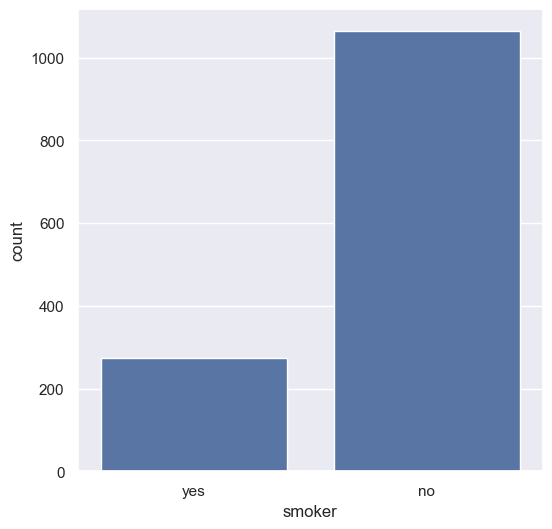

In [16]:
sns.set()
plt.figure(figsize = (6, 6))
sns.countplot(x = insurance_data["smoker"], data = insurance_data)
plt.show()

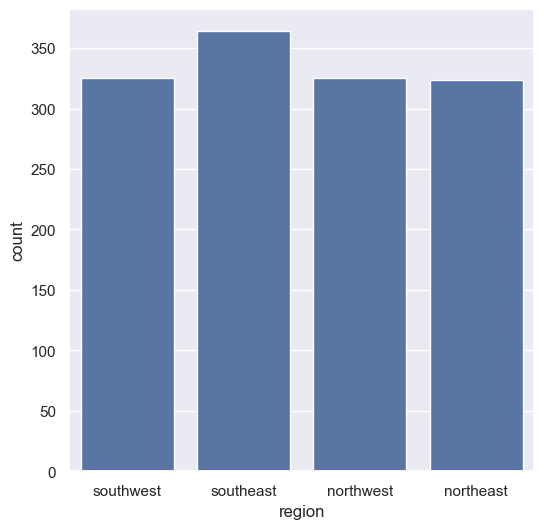

In [17]:
sns.set()
plt.figure(figsize = (6, 6))
sns.countplot(x = insurance_data["region"], data = insurance_data)
plt.show()

In [18]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [19]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
   
insurance_data.replace({"sex": {"female":0, "male":1}}, inplace=True)
insurance_data.replace({"smoker": {"no":0, "yes":1}}, inplace=True)
insurance_data.replace({"region": {"southeast":0, "southwest":1, "northeast":2, "northwest":3}}, inplace=True)


In [20]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,2,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


In [21]:
input_data = insurance_data.drop(columns = "charges")
output_data = insurance_data["charges"]

In [22]:
input_data

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,2
1335,18,0,36.850,0,0,0
1336,21,0,25.800,0,0,1


In [23]:
output_data

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [24]:
input_train_data, input_test_data, output_train_data, output_test_data = train_test_split(input_data, output_data, test_size=0.2)

In [25]:
print(input_data.shape, input_train_data.shape, input_test_data.shape)

(1338, 6) (1070, 6) (268, 6)


In [26]:
print(output_data.shape, output_train_data.shape, output_test_data.shape)

(1338,) (1070,) (268,)


In [27]:
model = RandomForestRegressor(n_estimators=100, max_depth=7)

In [28]:
model.fit(input_train_data, output_train_data)

RandomForestRegressor(max_depth=7)

In [29]:
test_data_predictions = model.predict(input_test_data)

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(test_data_predictions, output_test_data)

0.8466096515541733

In [32]:
input_data = (64, 1, 35, 1, 0, 0)
input_data_array = np.array(input_data)
input_data_array = input_data_array.reshape(1,-1)

In [33]:
insurance_premium = model.predict(input_data_array)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [34]:
insurance_premium[0]

np.float64(22547.193984849666)

In [35]:
import pickle as pkl

In [36]:
pkl.dump(model, open("MIPML.pkl", "wb"))